In [1]:
import igraph as ig
import matplotlib.pyplot as plt

In [30]:
def generate_graph(input_file):
    graph = ig.Graph.Load(input_file, format="ncol")
    graph.to_undirected(mode="each")
    return graph

In [47]:
g = generate_graph("../test/sample_graph.ncol")

In [55]:
communities = ig.Graph.community_leiden(g)

In [56]:
num_communities = len(communities)
palette = ig.RainbowPalette(n=num_communities)
for i, community in enumerate(communities):
    g.vs[community]["color"] = i
    community_edges = g.es.select(_within=community)
    community_edges["color"] = i


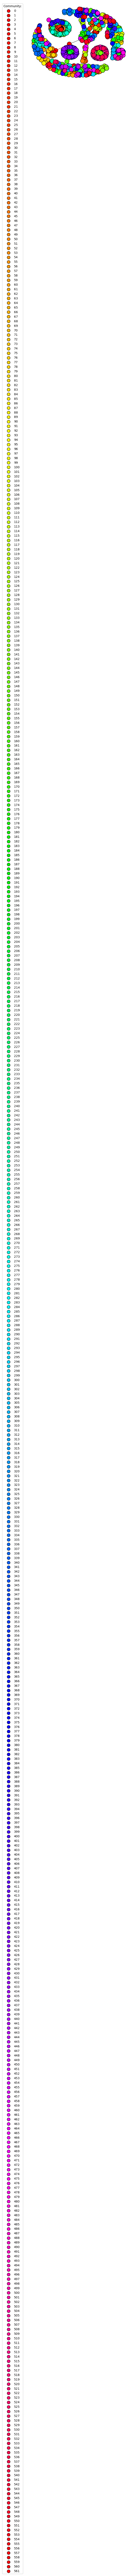

In [57]:
fig, ax = plt.subplots()
ig.plot(
    communities,
    palette=palette,
    edge_width=1,
    target=ax,
    vertex_size=20,
)

# Create a custom color legend
legend_handles = []
for i in range(num_communities):
    handle = ax.scatter(
        [],
        [],
        s=100,
        facecolor=palette.get(i),
        edgecolor="k",
        label=i,
    )
    legend_handles.append(handle)
ax.legend(
    handles=legend_handles,
    title="Community:",
    bbox_to_anchor=(0, 1.0),
    bbox_transform=ax.transAxes,
)
plt.show()